<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Содание-функций-upsample-и-downsample" data-toc-modified-id="Содание-функций-upsample-и-downsample-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Содание функций <code>upsample</code> и <code>downsample</code></a></span></li><li><span><a href="#Увеличение-выборки---upsample" data-toc-modified-id="Увеличение-выборки---upsample-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки - <code>upsample</code></a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки---downsampled" data-toc-modified-id="Уменьшение-выборки---downsampled-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки - <code>downsampled</code></a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#ROC-кривая" data-toc-modified-id="ROC-кривая-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ROC кривая</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Прогнозирование оттока клиентов «Бета-Банка»

По наблюдениям из «Бета-Банка» немного, но заметно стали уходить клиенты. А банковские маркетологи пришли к решению что: сохранять текущих клиентов дешевле, чем привлекать новых.

На основании данных от банка о поведении клиентов и расторжении договоров с банком нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

Потребуется построить модель с предельно большим значением `F1-меры` не ниже `0.59` дополнительно измерив `AUC-ROC` и сравнив её значение с `F1-мерой`

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle


In [2]:
data = pd.read_csv("/datasets/Churn.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Признаки**  
`RowNumber` — индекс строки в данных  
`CustomerId` — уникальный идентификатор клиента  
`Surname` — фамилия  
`CreditScore` — кредитный рейтинг  
`Geography` — страна проживания  
`Gender` — пол  
`Age` — возраст  
`Tenure` — сколько лет человек является клиентом банка  
`Balance` — баланс на счёте  
`NumOfProducts` — количество продуктов банка, используемых клиентом  
`HasCrCard` — наличие кредитной карты  
`IsActiveMember` — активность клиента  
`EstimatedSalary` — предполагаемая зарплата  

**Целевой признак**  
`Exited` — факт ухода клиента

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Есть пропуски в размере почти 10% в признаках о том как долго объект является клиентом банка.
Отбросим такие данные и перезапишем датафрейм.

In [5]:
data = data.dropna()

Отбросим `Surname`, `RowNumber`, `CustomerId` т.к. они не имеют значительного влияния на то если уйдет клиент из банка или нет.

In [6]:
data.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1, inplace=True)

Преобразуем категориальные признаки в численные прямым кодированием `OHE` и сохраним все в новый датафрейм `data_ohe`. Чтобы не попасть в дамми-ловушку, применим аргумент `drop_first` функции `pd.get_dummies()`

In [7]:
data_ohe = pd.get_dummies(data, drop_first=True)

Разделим датафрейм на выборки с признаками и целевой выборкой

In [8]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

Исходные данные разбивают в соотношении `3:1:1`. Размер укажем в `test_size=0.40`, а для разделения на тестовую и валидационную `test_size=0.50`.<br>
Зафиксируем псевдослучайность для алгоритма обучения укажем параметр `random_state=12345`<br>
Выведем на экран размеры выборок с помощью `.shape`

In [10]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345
)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345
)

print(features_train.shape)
print(features_test.shape)
print(features_valid.shape)

print(target_train.shape)
print(target_test.shape)
print(target_valid.shape)

(5454, 11)
(1818, 11)
(1819, 11)
(5454,)
(1818,)
(1819,)


In [11]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


Стандартизируем численные признаки, исключив некоторые бинарные, а преобразованные обучающую и валидационную выборки сохраним в переменных: `features_train` и `features_valid`.

In [12]:
numeric = ['CreditScore', 'Age', 'Tenure','Balance','EstimatedSalary', 'NumOfProducts']
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# print(features_train.head())


## Исследование задачи

Исследуем баланс классов, обучим модели без учёта дисбаланса.

Посчитаем доли для каждого класса

In [13]:
data['Exited'].value_counts(normalize=True)

0    0.796062
1    0.203938
Name: Exited, dtype: float64

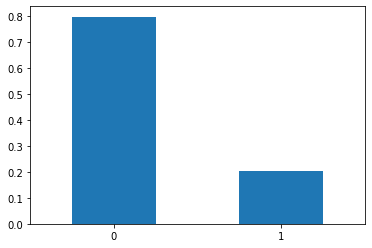

In [14]:
data['Exited'].value_counts(normalize=True).plot(kind='bar',rot=False)
plt.show()

Видим что баланс классов сильно различается, прежде чем приступим борьбе с дисбалансом, проверим несколько моделей с различными гиперпараметрами на этих данных и зафиксируем результаты `F1-меры`.

### LogisticRegression

Модель логистической регрессии с равнозначными классами

In [15]:
LRCW_model = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
LRCW_model.fit(features_train, target_train)

predicted_valid = LRCW_model.predict(features_valid)
precision = precision_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)

print("F1-мера:", f1_score(target_valid, predicted_valid))
print("Полнота:", recall)
print("Точность:", precision)

F1-мера: 0.5025432349949135
Полнота: 0.7037037037037037
Точность: 0.39082278481012656


Значение `F1-меры` равное `0.5113...` не достигает необходимого по заданию `0.59`

### DecisionTreeClassifier

Напишем функцию для модели решающего дерева с перебором глубины и определением наилучшего значения `F1-меры`

In [16]:
def best_f1_DTC_depth(features_train, target_train, features_valid, target_valid, n_depth):
    best_DTC_depth = 0
    best_DTC_result = 0
    best_DTC_f1 = 0
    best_DTC_precision = 0
    best_DTC_recall = 0

    for depth in range(2, n_depth):
        DTC_model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
        DTC_model.fit(features_train, target_train)
        
        result = DTC_model.score(features_valid, target_valid)
        predicted_valid = DTC_model.predict(features_valid)

        f1 = f1_score(target_valid, predicted_valid)
        precision = precision_score(target_valid, predicted_valid)
        recall = recall_score(target_valid, predicted_valid)

        if f1 > best_DTC_f1:
            best_DTC_depth = depth
            best_DTC_result = result
            best_DTC_f1 = f1
            best_DTC_precision = precision
            best_DTC_recall = recall

    print(f"Accuracy: {best_DTC_result}")
    print(f"Depth: {best_DTC_depth}")
    print(f"F1-мера: {best_DTC_f1}")
    print("Точность:", best_DTC_precision)
    print("Полнота:", best_DTC_recall)

Проверим функцию `best_f1_DTC_depth` передав в качестве параметра диапазона максимальной глубины значение `100`

In [17]:
# best_f1_DTC_depth(features_train, target_train, features_valid, target_valid, 100)

Результат выполнения функции `best_f1_DTC_depth(features_train, target_train, features_valid, target_valid, 100)`<br>

`
Accuracy: 0.8554150632215503
Depth: 7  
F1-мера: 0.5534804753820034  
Точность: 0.6848739495798319  
Полнота: 0.46438746438746437  
`

Наилучшее значение `F1-меры` равное `0.5534...` не достигает необходимого по заданию `0.59` при наилучшей глубине равной `7`

In [18]:
DTC_model = DecisionTreeClassifier(max_depth=7, random_state=12345)
DTC_model.fit(features_train, target_train)

predicted_valid = DTC_model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5534804753820034


### RandomForestClassifier

Функция Случайный лес с перебором количества деревьев и глубины

In [19]:
def best_f1_RFC_depth(features_train, target_train, features_valid, target_valid, n_est, n_depth):
    best_RFC_depth = 0
    best_RFC_result = 0
    best_RFC_f1 = 0
    best_RFC_precision = 0
    best_RFC_recall = 0
    best_RFC_estimators = 0

    for est in range(2, n_est):
        for depth in range(2, n_depth):
            RFC_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
            RFC_model.fit(features_train, target_train)

            result = RFC_model.score(features_valid, target_valid)
            predicted_valid = RFC_model.predict(features_valid)

            f1 = f1_score(target_valid, predicted_valid)
            precision = precision_score(target_valid, predicted_valid)
            recall = recall_score(target_valid, predicted_valid)

            if f1 > best_RFC_f1:
                best_RFC_estimators = est
                best_RFC_depth = depth
                best_RFC_result = result
                best_RFC_f1 = f1
                best_RFC_precision = precision
                best_RFC_recall = recall

    print(f"Accuracy: {best_RFC_result}")
    print(f"Est: {best_RFC_estimators}")
    print(f"Depth: {best_RFC_depth}")
    print(f"F1-мера: {best_RFC_f1}")
    print("Точность:", best_RFC_precision)
    print("Полнота:", best_RFC_recall)

Проверим функцию `best_f1_RFC_depth` передав в качестве параметров диапазон количества деревьев со значением `100` и максимальной глубины со значением `20`

In [20]:
# best_f1_RFC_depth(features_train, target_train, features_valid, target_valid, 100, 20)

Результат выполнения функции `best_f1_RFC_depth(features_train, target_train, features_valid, target_valid, 100, 20)`
`
Accuracy: 0.8724573941726224
Est: 17
Depth: 13
F1-мера: 0.5944055944055944
Точность: 0.7692307692307693
Полнота: 0.4843304843304843
`

Наилучшее значение `F1-меры` равное `0.5944...` достигает необходимого по заданию `0.59` при наилучшей глубине `13` и количеству деревьев равному `17`

In [21]:
RFC_model = RandomForestClassifier(random_state=12345, n_estimators=17, max_depth=13)
RFC_model.fit(features_train, target_train)

predicted_valid = RFC_model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5944055944055944


### Вывод

Сравнение показаний `F1-меры` для трех моделей и их гиперпараметров для несбалансированной выборки:  

• `LRCW_model` с гиперпараметрами: `class_weight='balanced'` = f1-мера: `0.5025432349949135`  
• `DTC_model` с гиперпараметрами: `max_depth=7` = f1-мера: `0.5534804753820034`  
• `RFC_model` с гиперпараметрами: `n_estimators=17` и `max_depth=13` = f1-мера: `0.5944055944055944`  
 

В итоге после применения трех моделей с различными гиперпараметрами достичь `F1-меры` с максимальным приближением в `0.5944...` удалось получить лишь с применением модели `RFC_model - RandomForestClassifier` и гиперапараметрами `n_estimators=17`, `max_depth=13`<br>
На следующих шагах предпримем меры по обработке дисбаланса и проверим такие же модели еще раз.

## Борьба с дисбалансом

Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдем лучшую.  
Разделим обучающую выборку на отрицательные и положительные объекты и посмотрим на их разницу используя метод `.shape`

In [22]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target == 0]
target_ones = target_train[target == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)


(4328, 11)
(1126, 11)
(4328,)
(1126,)


### Содание функций `upsample` и `downsample`

Создадим две функции  
• `upsample` - для увеличения выборки и  
• `downsample` - для уменьшения

Функция `upsample` - скопируем несколько раз положительные объекты, с учётом полученных данных создадим новую обучающую выборку и перемешаем данные с помощью функции `shuffle()`

In [23]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Функция `downsample` - случайным образом отбросим часть из отрицательных объектов, с учётом полученных данных создадим новую обучающую выборку и так же перемешаем данные с помощью функции `shuffle()`

In [24]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

### Увеличение выборки - `upsample`

In [25]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 2)
print(features_upsampled.shape)
print(target_upsampled.shape)

(6580, 11)
(6580,)


#### LogisticRegression

Модель логистической регрессии с увеличенной выборкой и балансом классов

In [26]:
LRCW_UPS_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
LRCW_UPS_model.fit(features_upsampled, target_upsampled)
predicted_valid = LRCW_UPS_model.predict(features_valid)

print("F1-мера:", f1_score(target_valid, predicted_valid))

F1-мера: 0.5025432349949135


#### DecisionTreeClassifier

Поиск наилучшей глубины моделью `DecisionTreeClassifier`

In [27]:
# best_f1_DTC_depth(features_upsampled, target_upsampled, features_valid, target_valid, 10)

Результат функции `best_f1_DTC_depth(features_upsampled, target_upsampled, features_valid, target_valid, 10)`<br>
`
Accuracy: 0.822429906542056
Depth: 5
F1-мера: 0.5832258064516129
Точность: 0.5330188679245284
Полнота: 0.6438746438746439
`

Наилучший показатель `F1` равен `0.5832...` для `DecisionTreeClassifier` достигнут с гиперпараметрами `max_depth=5` для `upsampled` выборки

In [28]:
DTC_UPS_model = DecisionTreeClassifier(max_depth=5, random_state=12345)
DTC_UPS_model.fit(features_upsampled, target_upsampled)
predicted_valid = DTC_UPS_model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5832258064516129


#### RandomForestClassifier

Поиск наилучшей глубины и количеством деревьев моделью `RandomForestClassifier`

In [29]:
# best_f1_RFC_depth(features_upsampled, target_upsampled, features_valid, target_valid, 100, 20)

Результат функции `best_f1_RFC_depth(features_upsampled, target_upsampled, features_valid, target_valid, 100, 20)`<br>
`
Accuracy: 0.8713578889499725
Est: 24
Depth: 16
F1-мера: 0.6309148264984227
Точность: 0.7067137809187279
Полнота: 0.5698005698005698
`

Наилучший показатель `F1` равен `0.6309...` для `RandomForestClassifier` достигнут с гиперпараметрами `max_depth=16` и `n_estimators=24` для `upsampled` выборки

In [30]:
RFC_UPS_model = RandomForestClassifier(random_state=12345, n_estimators=24, max_depth=16)
RFC_UPS_model.fit(features_upsampled, target_upsampled)

predicted_valid = RFC_UPS_model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6309148264984227


#### Вывод

Сравнение показаний `F1-меры` для трех моделей и их гиперпараметров для **увеличенной** выборки:  
• `LRCW_UPS_model` с гиперпараметрами: `class_weight='balanced'` = f1-мера: `0.5025432349949135`  
• `DTC_UPS_model` с гиперпараметрами: `max_depth=5` = f1-мера: `0.5832258064516129`  
• `RFC_UPS_model` с гиперпараметрами: `n_estimators=24` и `max_depth=16` = f1-мера: `0.6309148264984227`  

В итоге после применения трех моделей с различными гиперпараметрами достичь `F1-меры` со значением в `0.6309...` удалось получить лишь с применением модели `RFC_UPS_model - RandomForestClassifier` и гиперапараметрами `n_estimators24`, `max_depth=16`<br>
На следующем шаге попробуем уменьшить выборку и проверим такие же модели еще раз.

### Уменьшение выборки - `downsampled`

In [31]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.8)
print(features_downsampled.shape)
print(target_downsampled.shape)

(4588, 11)
(4588,)


#### LogisticRegression

Модель логистической регрессии с уменьшеной выборкой и балансом классов

In [32]:
LRCW_DOWNS_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
LRCW_DOWNS_model.fit(features_downsampled, target_downsampled)
predicted_valid = LRCW_DOWNS_model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5010183299389003


#### DecisionTreeClassifier

Поиск наилучшей глубины моделью `DecisionTreeClassifier`

In [33]:
# best_f1_DTC_depth(features_downsampled, target_downsampled, features_valid, target_valid, 20)

Результат функции `best_f1_DTC_depth(features_downsampled, target_downsampled, features_valid, target_valid, 20)`<br>
`
Accuracy: 0.8581638262781748
Depth: 6
F1-мера: 0.559726962457338
Точность: 0.6978723404255319
Полнота: 0.4672364672364672
`

Наилучший показатель `F1` равен `0.5597...` для `DecisionTreeClassifier` достигнут с гиперпараметрами `max_depth=6` для `downsampled` выборки

In [34]:
DTC_DOWNS_model = DecisionTreeClassifier(max_depth=6, random_state=12345)
DTC_DOWNS_model.fit(features_downsampled, target_downsampled)
predicted_valid = DTC_DOWNS_model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.559726962457338


#### RandomForestClassifier

Поиск наилучшей глубины и количеством деревьев моделью `RandomForestClassifier`

In [35]:
# best_f1_RFC_depth(features_downsampled, target_downsampled, features_valid, target_valid, 100, 20)

Результат функции `best_f1_RFC_depth(features_downsampled, target_downsampled, features_valid, target_valid, 100, 20)`<br>
`
Accuracy: 0.8658603628367235
Est: 59
Depth: 19
F1-мера: 0.6064516129032258
Точность: 0.6988847583643123
Полнота: 0.5356125356125356
`

Наилучший показатель `F1` равный `0.6064...` для `RandomForestClassifier` достигнут с гиперпараметрами `max_depth=19` и `n_estimators=59` для `downsampled` выборки

In [36]:
RFC_DOWNS_model = RandomForestClassifier(random_state=12345, n_estimators=59, max_depth=19)
RFC_DOWNS_model.fit(features_downsampled, target_downsampled)

predicted_valid = RFC_DOWNS_model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6064516129032258


#### Вывод

Сравнение показаний `F1-меры` для трех моделей и их гиперпараметров для **уменьшеной** выборки:  
• `LRCW_DOWNS_model` с гиперпараметрами: `class_weight='balanced'` = f1-мера: `0.5010183299389003`  
• `DTC_DOWNS_model` с гиперпараметрами: `max_depth=6` = f1-мера: `0.559726962457338`  
• `RFC_DOWNS_model` с гиперпараметрами: `n_estimators=59` и `max_depth=19` = f1-мера: `0.6064516129032258`  

В итоге после применения трех моделей с различными гиперпараметрами удалось получить `F1-меры` выше `0.59` для модели:<br>
• `F1-мера` равная `0.6064...` для `RFC_DOWNS_model - RandomForestClassifier` и гиперапараметрами `n_estimators=59`, `max_depth=19`<br>



## Тестирование моделей

Перечень моделей:  
• `LRCW_model` - логистической регрессии и балансом классов  
• `DTC_model` - решающего дерева и глубиной `=7`  
• `RFC_model` - случайный лес с количеством деревьев `=17` и глубиной `=13`

С увеличенной выборкой `upsample`:<br>
• `LRCW_UPS_model` - логистической регрессии и балансом классов  
• `DTC_UPS_model` - решающего дерева и глубиной `=5`   
• `RFC_UPS_model` - случайный лес с количеством деревьев `=24` и глубиной `=16`  

С уменьшеной выборкой `downsample`:<br>
• `LRCW_DOWNS_model` - логистической регрессии и балансом классов  
• `DTC_DOWNS_model` - решающего дерева и глубиной `=6`  
• `RFC_DOWNS_model` - случайный лес с количеством деревьев `=59` и глубиной `=19`  

In [37]:
models_dict = {
    'LRCW_model' : LRCW_model,
    'DTC_model' : DTC_model,
    'RFC_model' : RFC_model,
    'LRCW_UPS_model' : LRCW_UPS_model, 
    'DTC_UPS_model' : DTC_UPS_model,
    'RFC_UPS_model' : RFC_UPS_model,
    'LRCW_DOWNS_model' : LRCW_DOWNS_model, 
    'DTC_DOWNS_model' : DTC_DOWNS_model,
    'RFC_DOWNS_model' : RFC_DOWNS_model,
    }

In [38]:
def testing_models(model_name, model):
    predicted_test = model.predict(features_test)
    print(
        f"|• Модель: {model_name} \n"
        f"|• F1-мера: {f1_score(target_test, predicted_test)}\n")

In [39]:
for key, value in models_dict.items():
    testing_models(key, value)

|• Модель: LRCW_model 
|• F1-мера: 0.509731232622799

|• Модель: DTC_model 
|• F1-мера: 0.5764331210191083

|• Модель: RFC_model 
|• F1-мера: 0.5590682196339434

|• Модель: LRCW_UPS_model 
|• F1-мера: 0.509731232622799

|• Модель: DTC_UPS_model 
|• F1-мера: 0.5916167664670658

|• Модель: RFC_UPS_model 
|• F1-мера: 0.6054216867469879

|• Модель: LRCW_DOWNS_model 
|• F1-мера: 0.5078485687903971

|• Модель: DTC_DOWNS_model 
|• F1-мера: 0.575609756097561

|• Модель: RFC_DOWNS_model 
|• F1-мера: 0.5905631659056316



### ROC кривая

Создадим функцию которая подсчитает `TPR` и `FPR` и выведет график с `ROC-кривой`.
Дополнительно чтобы выявить, как сильно модель отличается от случайной, посчитаем площадь под `ROC-кривой`, выведем метрику `AUC-ROC` на графике.  
Чем больше кривая охватывает верхний левый угол графика, тем лучше модель классифицирует данные по категориям.  
И чем ближе `AUC` к `1`, тем лучше модель.

Переберем все модели и построим графики

In [41]:
def roc_curve_plot_all():
    
    fpr_tpr_list = []
    auc_roc_list = []
    model_names_list = []
    
    for model_name, model in models_dict.items():
        probabilities_test = model.predict_proba(features_test)
        probabilities_one_test = probabilities_test[:, 1]

        fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
        
        fpr_tpr_list.append([fpr, tpr])
        auc_roc_list.append(roc_auc_score(target_test, probabilities_one_test))
        model_names_list.append(model_name)

    plt.style.use('seaborn')
    plt.figure(figsize=(14,7))
    
    for i in range(len(model_names_list)):
        plt.plot(fpr_tpr_list[i][0],
                 fpr_tpr_list[i][1],
                 label=f"Модель: {model_names_list[i]} \nAUC: {auc_roc_list[i]}\n",
                 alpha=0.7,
                )
    # ROC-кривая случайной модели (выглядит как прямая)c
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.ylim([0.0, 1])
    plt.xlim([0.0, 1])
    plt.title(f'ROC-кривые')
    plt.legend(bbox_to_anchor=(1,0), loc="lower left")
    plt.grid(color='grey', linestyle='-.', linewidth=0.7)
    
    plt.show()

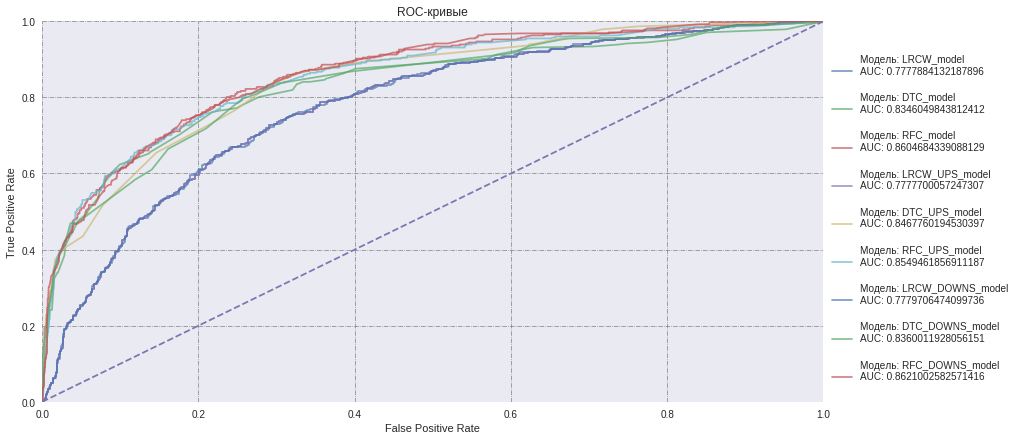

In [42]:
roc_curve_plot_all()

Наилучший показатель `AUC=0.8621...`  метрики у модели `RFC_DOWNS_model`, модели случайного леса с уменьшиной выборкой, с количеством деревьев `=59` и глубиной `=19`

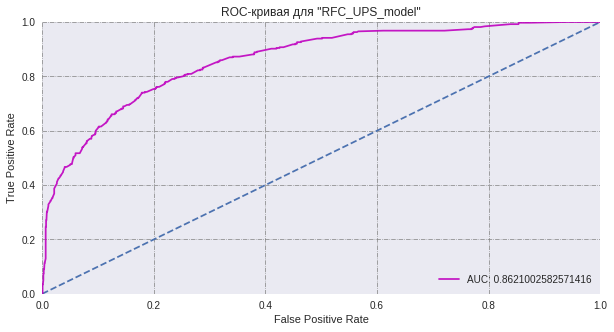

In [43]:
probabilities_test = RFC_DOWNS_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)

plt.figure(figsize=(10,5))

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, label=f"AUC: {auc_roc}", alpha=0.9, color = "m")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1])
plt.xlim([0.0, 1])
plt.title(f'ROC-кривая для "RFC_UPS_model"')
plt.legend(loc=4)
plt.grid(color='grey', linestyle='-.', linewidth=0.7)

plt.show()

## Общий вывод

Применение прямого кодирования `OHE` и масштабирование выборки не помогли достичь необходимого по заданию показателя `F1-меры` равному `0.59` с использованием трех моделей, максимальное приближение со значением в `0.5764...` удалось получить лишь с применением модели:  
- `DTC_model - RandomForestClassifier` и гиперапараметрами `n_estimators=17`, `max_depth=13`<br><br>

Посчитав долю классов для `data['Exited']` было заметно что дисбаланс между классами почти в три раза и необходимо использовать дополнительные инструменты для борьбы с дисбалансом.<br>

Попробовали увеличить выборку и использовать такие же три модели с различными гиперпараметрами. В результате достичь `F1-меры` с максимальным значением в `0.6054...` удалось получить лишь с применением модели:  
- `RFC_UPS_model - RandomForestClassifier` и гиперапараметрами `n_estimators24`, `max_depth=16`<br> 

После уменьшения выборки удалось получить `F1-меру` со значением в `0.5905...` лишь с применением модели:<br>
- `RFC_DOWNS_model - RandomForestClassifier` и гиперапараметрами `n_estimators=59`, `max_depth=19`<br><br>

Сравнив все три результата моделей с дисбалансом, увеличенной и уменьшеной выборкой а так же построив графики с `ROC-кривой` и выводом метрики `AUC-ROC` наилучшими моделями являются:<br>
- `RFC_UPS_model` с гиперпараметрами: `n_estimators=24` и `max_depth=16` для увеличенной выборки. Ее показатель `F1-меры` равен `0.6344...` и показатель `AUC` равен `0.8549...` <br><br>
- `RFC_DOWNS_model` с гиперпараметрами: `n_estimators=59` и `max_depth=19` для уменьшиной выборки. Ее показатель `F1-меры` равен `0.5905...` и показатель `AUC` равен `0.8621...` 